In [70]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
import time
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/kaggle/input/diabetes-dataset-with-18-features/diabetes.csv', header=0)

# Separate features and target
X = df.drop('Diabetes', axis=1)
y = df['Diabetes']

# Split the data 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# Standardize the features
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# Create and train a Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=200, random_state=1)
gb_start_time = time.time()

gb_classifier.fit(X_train_std, y_train)
gb_end_time = time.time()

# Predict training accuracy score
gb_train = accuracy_score(y_train, gb_classifier.predict(X_train_std))

# Predict test accuracy score
gb_test = accuracy_score(y_test, gb_classifier.predict(X_test_std))

# Evaluate other metrics: precision, recall, and confusion matrix
y_pred = gb_classifier.predict(X_test_std)
confusion_matrix_result = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('Gradient Boosting - Training Accuracy: {:.2f}, Testing Accuracy: {:.2f}'.format(gb_train, gb_test))
print('Gradient Boosting - Training Time: {:.2f}s, Testing Time: {:.2f}s'.format(gb_end_time - gb_start_time, gb_end_time - gb_start_time))
print('Confusion Matrix:\n', confusion_matrix_result)
print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))


Gradient Boosting - Training Accuracy: 0.99, Testing Accuracy: 0.95
Gradient Boosting - Training Time: 2.15s, Testing Time: 2.15s
Confusion Matrix:
 [[584  16]
 [ 27 234]]
Precision: 0.94
Recall: 0.90


In [71]:
from sklearn.ensemble import RandomForestClassifier

# Create and train a Gradient Boosting Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=1)
rf_start_time = time.time()

rf_classifier.fit(X_train_std, y_train)
rf_end_time = time.time()

# Predict training accuracy score
rf_train = accuracy_score(y_train, rf_classifier.predict(X_train_std))

# Predict test accuracy score
rf_test = accuracy_score(y_test, rf_classifier.predict(X_test_std))

# Evaluate other metrics: precision, recall, and confusion matrix
y_pred = rf_classifier.predict(X_test_std)
confusion_matrix_result = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('Gradient Boosting - Training Accuracy: {:.2f}, Testing Accuracy: {:.2f}'.format(rf_train, rf_test))
print('Gradient Boosting - Training Time: {:.2f}s, Testing Time: {:.2f}s'.format(rf_end_time - rf_start_time, rf_end_time - rf_start_time))
print('Confusion Matrix:\n', confusion_matrix_result)
print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))


Gradient Boosting - Training Accuracy: 1.00, Testing Accuracy: 0.96
Gradient Boosting - Training Time: 0.73s, Testing Time: 0.73s
Confusion Matrix:
 [[587  13]
 [ 25 236]]
Precision: 0.95
Recall: 0.90


27/27 [==============================] - 0s 1ms/step
Artificial Neural Network (ANN) - Training Accuracy: 0.99, Testing Accuracy: 0.95
ANN - Training Time: 28.75s, Testing Time: 28.75s
Confusion Matrix:
 [[582  18]
 [ 23 238]]
Precision: 0.93
Recall: 0.91


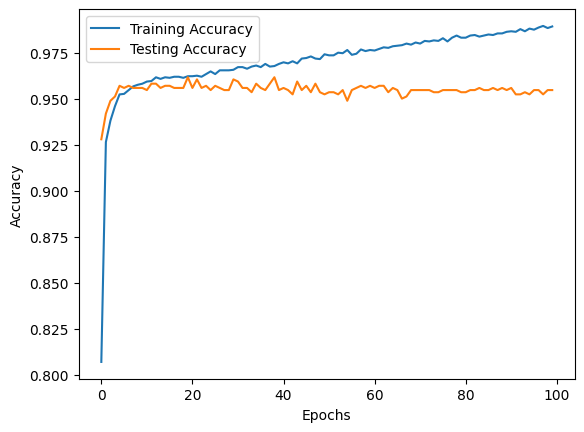

In [72]:
import tensorflow as tf

# Build an Artificial Neural Network (ANN) using TensorFlow and Keras
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_dim=X_train_std.shape[1]),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
    
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

ann_start_time = time.time()

history = model.fit(X_train_std, y_train, epochs=100, batch_size=32, validation_data=(X_test_std, y_test), verbose=0)

ann_end_time = time.time()

# Extract training and testing accuracies from history
training_acc = history.history['accuracy']
testing_acc = history.history['val_accuracy']

threshold = 0.35

# Predict training accuracy score
ann_train = accuracy_score(y_train, (model.predict(X_train_std) > threshold).astype(int))

# Predict test accuracy score
ann_test = accuracy_score(y_test, (model.predict(X_test_std) > threshold).astype(int))


# Evaluate other metrics: precision, recall, and confusion matrix
y_pred = (model.predict(X_test_std) > threshold).astype(int)
confusion_matrix_result = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('Artificial Neural Network (ANN) - Training Accuracy: {:.2f}, Testing Accuracy: {:.2f}'.format(ann_train, ann_test))
print('ANN - Training Time: {:.2f}s, Testing Time: {:.2f}s'.format(ann_end_time - ann_start_time, ann_end_time - ann_start_time))
print('Confusion Matrix:\n', confusion_matrix_result)
print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))

# Plot training and testing accuracies
plt.plot(training_acc, label='Training Accuracy')
plt.plot(testing_acc, label='Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()